In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(device=gpu, enable=True)   
#GPU内存管理

In [3]:
train_dir = 'sat2/train'
test_dir = 'sat2/val'

im_size = 224
batch_size = 32

In [4]:
train_images = ImageDataGenerator(rescale = 1/255,horizontal_flip=True)
test_images = ImageDataGenerator(rescale = 1/255)
#归一化

In [5]:
train_gen = train_images.flow_from_directory(directory=train_dir,
                                             batch_size=batch_size,
                                             shuffle=True,
                                             target_size=(im_size, im_size),
                                             class_mode='categorical')
#按路径载入图片，批处理大小，随机，尺寸，读热编码

Found 3150 images belonging to 5 classes.


In [6]:
val_gen = test_images.flow_from_directory(directory=test_dir,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          target_size=(im_size, im_size),
                                          class_mode='categorical')
#按路径载入图片，批处理大小，随机，尺寸，读热编码

Found 350 images belonging to 5 classes.


In [7]:
classes = train_gen.class_indices
#类别查看

In [8]:
classes

{'airplane': 0, 'bridge': 1, 'palace': 2, 'ship': 3, 'stadium': 4}

In [9]:
vgg = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=(224, 224, 3))
vgg.trainable = False
#迁移学习 去掉全连接层 加载权重 输入尺寸

In [10]:
model = tf.keras.Sequential()
#VGG-11/16

In [11]:
model.add(vgg)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 5

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['acc'])
#学习率设置

In [14]:
history = model.fit(train_gen,epochs=10,validation_data=val_gen)

Epoch 1/10
99/99 [==============================] - 16s 109ms/step - loss: 1.4274 - acc: 0.5566 - val_loss: 0.4208 - val_acc: 0.8229
Epoch 2/10
99/99 [==============================] - 8s 77ms/step - loss: 0.4347 - acc: 0.8302 - val_loss: 0.2936 - val_acc: 0.8886
Epoch 3/10
99/99 [==============================] - 8s 77ms/step - loss: 0.3720 - acc: 0.8685 - val_loss: 0.2911 - val_acc: 0.8886
Epoch 4/10
99/99 [==============================] - 8s 77ms/step - loss: 0.3180 - acc: 0.8961 - val_loss: 0.2856 - val_acc: 0.8914
Epoch 5/10
99/99 [==============================] - 8s 77ms/step - loss: 0.3075 - acc: 0.8848 - val_loss: 0.2811 - val_acc: 0.9171
Epoch 6/10
99/99 [==============================] - 8s 77ms/step - loss: 0.2518 - acc: 0.9057 - val_loss: 0.2592 - val_acc: 0.9086
Epoch 7/10
99/99 [==============================] - 8s 76ms/step - loss: 0.2281 - acc: 0.9177 - val_loss: 0.2210 - val_acc: 0.9343
Epoch 8/10
99/99 [==============================] - 8s 76ms/step - loss: 0.2149 -

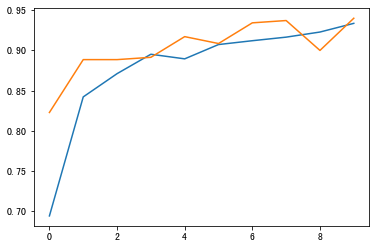

In [15]:
plt.plot(history.epoch,history.history.get('acc'))
plt.plot(history.epoch,history.history.get('val_acc'))

In [16]:
model.evaluate(val_gen)

11/11 [==============================] - 1s 63ms/step - loss: 0.2163 - acc: 0.9400


[0.21628598868846893, 0.9399999976158142]

In [17]:
# 保存模型
model.save('sat4.h5')